In [12]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
import cv2
import time
np.set_printoptions(threshold=np.inf) 
import pickle
import pdb

In [13]:
import os
path='/Users/lay/Desktop/DHG2016/'
index_file='/Users/lay/Desktop/DHG2016/informations_troncage_sequences.txt'
f=open(index_file)
iter_f=iter(f)
start_index_dict={}
end_index_dict={}
for l1 in iter_f:
    l=l1.split()
    gesture=l[0]
    finger=l[1]
    subject=l[2]
    position=l[3]
    start=int(l[4])
    end=int(l[5])
    start_index_dict[gesture+finger+subject+position]=start
    end_index_dict[gesture+finger+subject+position]=end
    

In [14]:
path='/Users/lay/Desktop/DHG2016/'
gesture_list=['1','3','4','5','6']
subject_list=[str(i) for i in range(1,21)]
position_list=[str(i) for i in range(1,6)]
single_finger_list=['2','4','5','6']
for gesture in gesture_list:
    for subject in subject_list:
        for position in position_list:
            if gesture in single_finger_list:
                finger='1'
            else:
                finger='2'
            new_path=path+'gesture_'+gesture+'/finger_'+finger+'/subject_'+subject+'/essai_'+position+'/'
            start=start_index_dict[gesture+finger+subject+position]
            end=end_index_dict[gesture+finger+subject+position]
            f=open(new_path+'general_information.txt')
            iter_f=iter(f)
            flag=0
            binary_feature=[]
            for line in iter_f:
                flag=flag+1
                if flag>=start and flag<=end:
                    l=line.split()
                    x=int(l[1])
                    y=int(l[2])
                    width=int(l[3])
                    height=int(l[4])
                    image=mpimg.imread(new_path+'depth_'+str(flag)+'.png')
                    image=image[range(y,y+height),:]
                    image=image[:,range(x,x+width)]
                    im=cv2.resize(image,(16,16),interpolation=cv2.INTER_CUBIC)
                    n=im.shape
                    for i in range(n[0]):
                        for j in range(n[1]):
                            if im[i][j]>9.9e-03 or im[i][j]<1e-03:
                                im[i][j]=0
                            else:
                                im[i][j]=1
                    binary_feature.append(im.flatten().tolist())
            B=np.array(binary_feature)
            np.savetxt(path+'gesture_'+gesture+'/finger_'+finger+'/subject_'+subject+'/essai_'+position+'/'+'binary_feature.txt',B)

                        

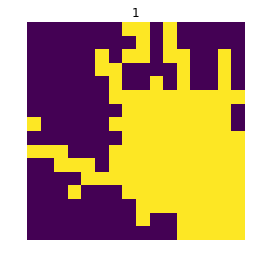

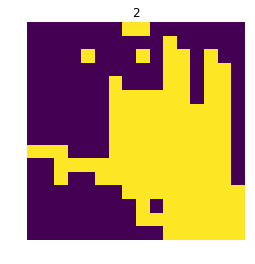

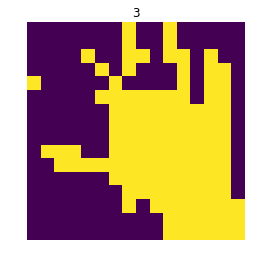

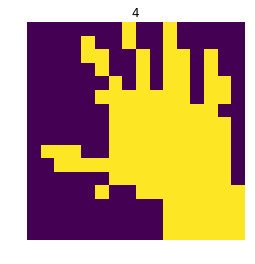

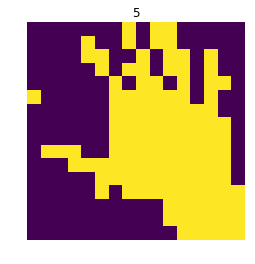

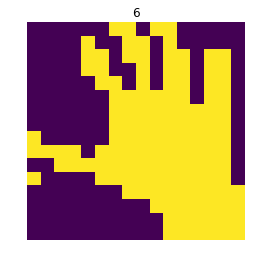

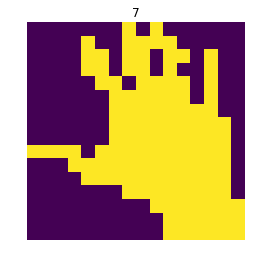

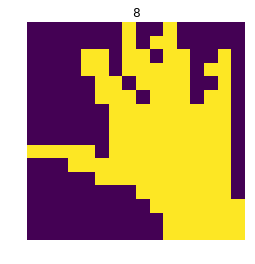

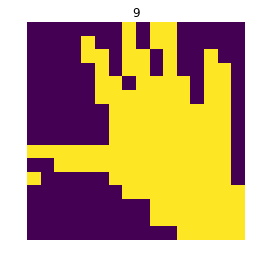

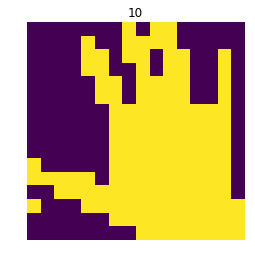

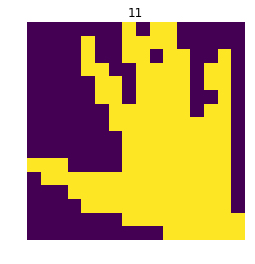

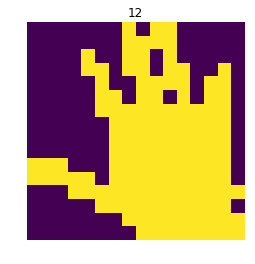

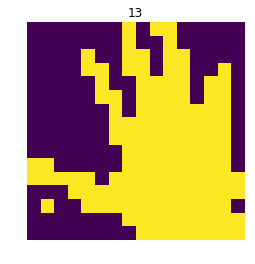

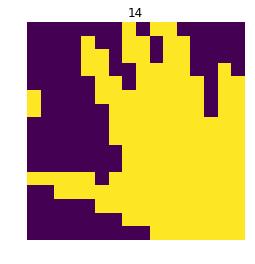

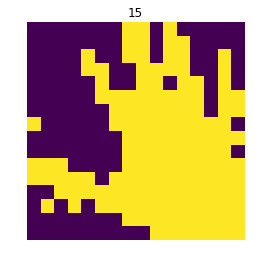

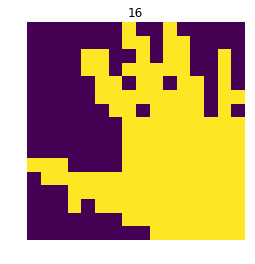

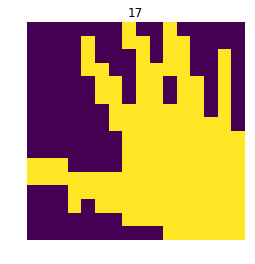

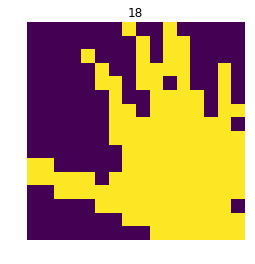

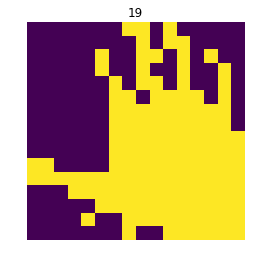

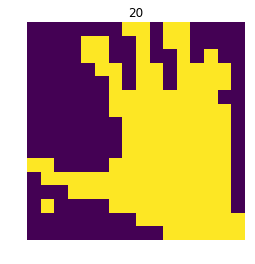

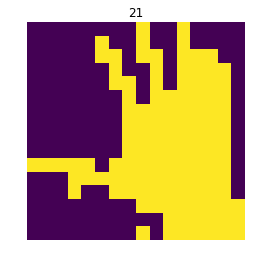

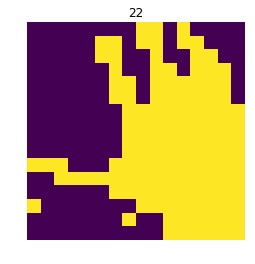

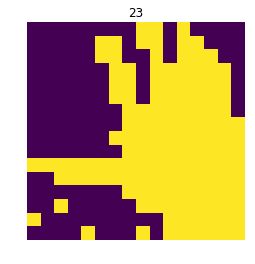

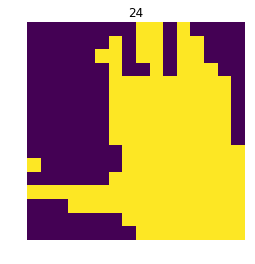

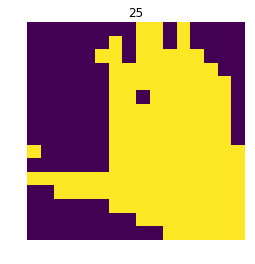

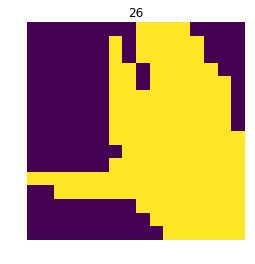

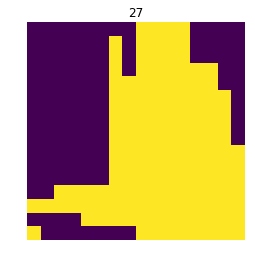

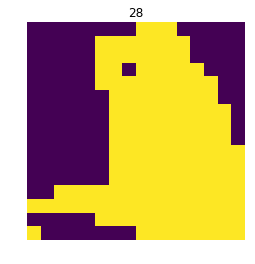

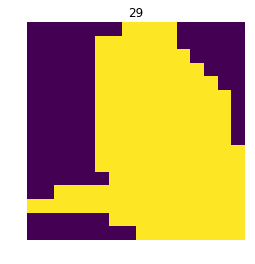

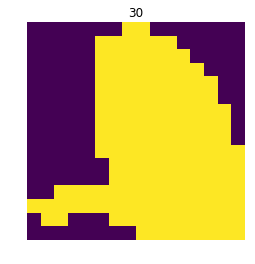

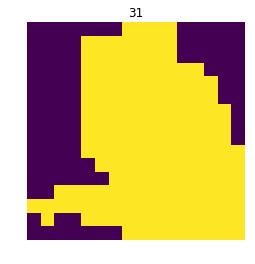

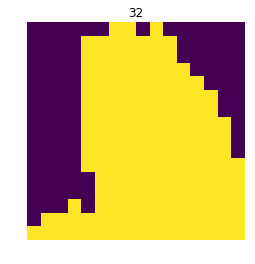

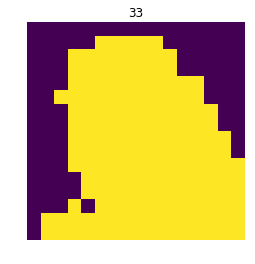

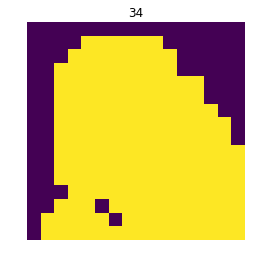

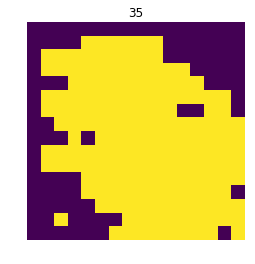

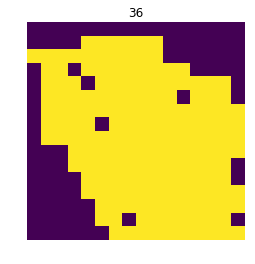

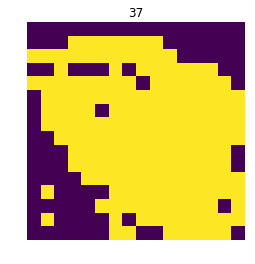

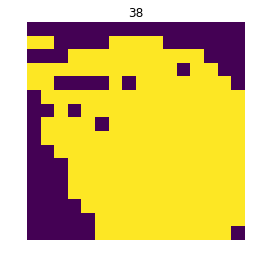

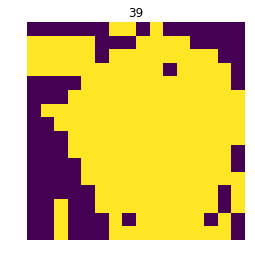

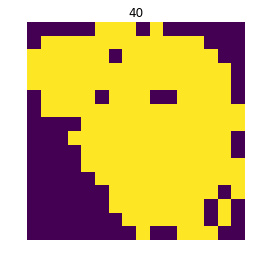

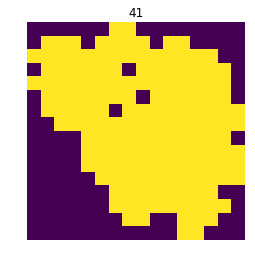

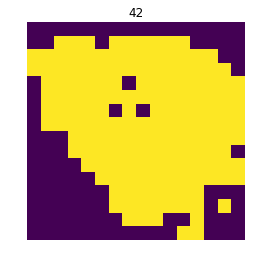

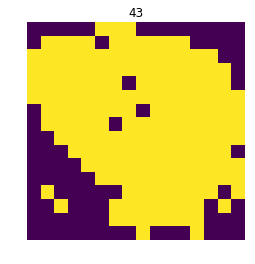

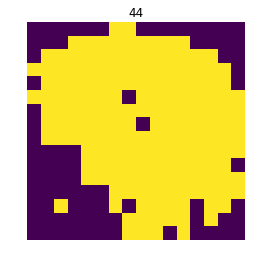

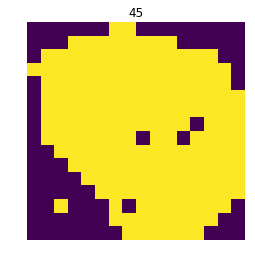

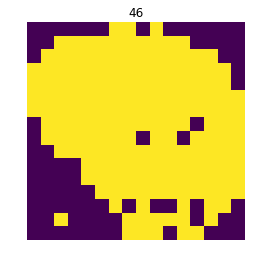

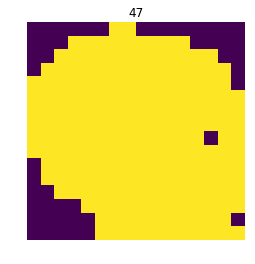

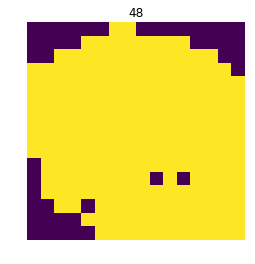

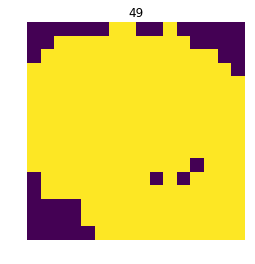

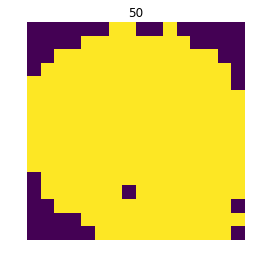

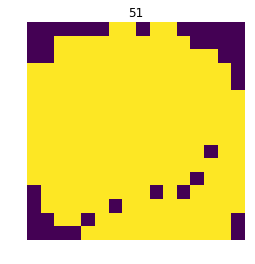

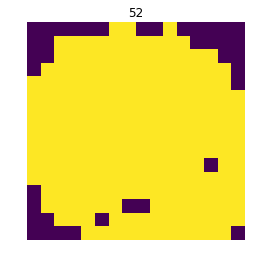

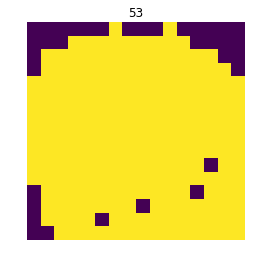

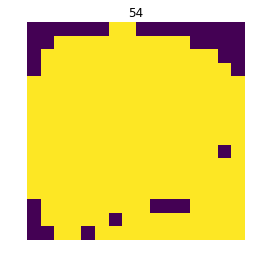

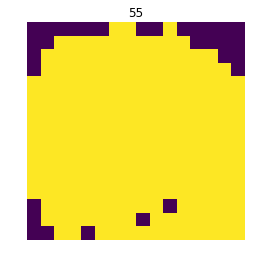

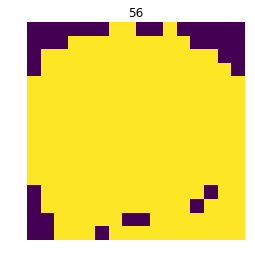

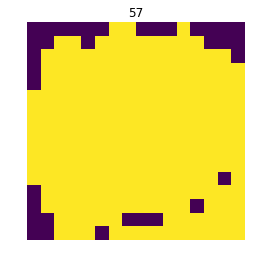

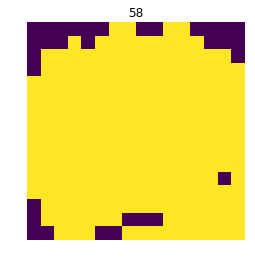

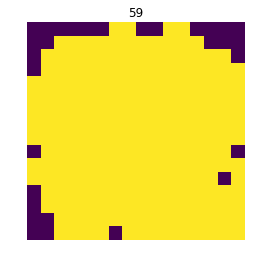

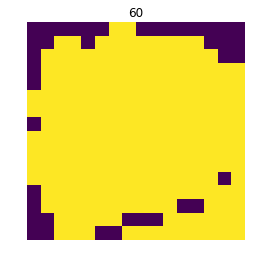

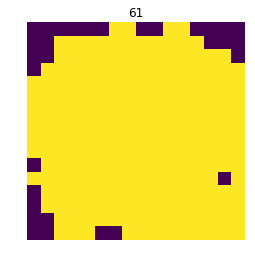

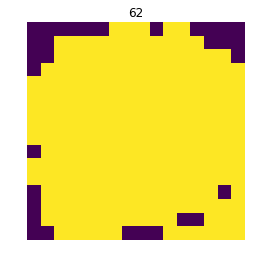

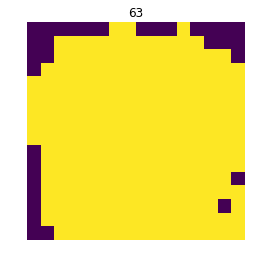

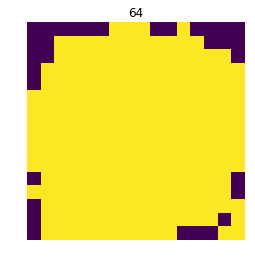

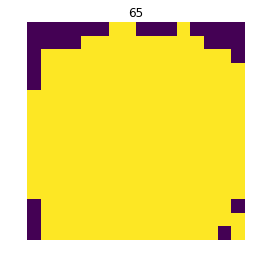

SyntaxError: 'break' outside loop (<ipython-input-5-9edfdb49f136>, line 53)

In [5]:
#visualization
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
import cv2
import time
np.set_printoptions(threshold=np.inf) 
path='/Users/lay/Desktop/DHG2016/'
gesture_list=['1']
subject_list=['10']
position_list=['1']
finger_list=['2']
single_finger_list=['2','4','5','6']
flag=0
for gesture in gesture_list:
    for subject in subject_list:
        for position in position_list:
            if gesture in single_finger_list:
                finger='1'
            else:
                finger='2'
            new_path=path+'gesture_'+gesture+'/finger_'+finger+'/subject_'+subject+'/essai_'+position+'/'
            flag=flag+1
            f=open(new_path+'general_information.txt')
            iter_f=iter(f)
            flag=0
            for line in iter_f:
                flag=flag+1
                l=line.split()
                x=int(l[1])
                y=int(l[2])
                width=int(l[3])
                height=int(l[4])
                image=mpimg.imread(new_path+'depth_'+str(flag)+'.png')
                image=image[range(y,y+height),:]
                image=image[:,range(x,x+width)]
                im=cv2.resize(image,(16,16),interpolation=cv2.INTER_CUBIC)
                n=im.shape
                for i in range(n[0]):
                    for j in range(n[1]):
                        if im[i][j]>9.9e-03 or im[i][j]<1e-03:
                            im[i][j]=0
                        else:
                            im[i][j]=1
                plt.imshow(im) 
                plt.title(str(flag))
                plt.axis('off') 
                plt.show()
                #time.sleep(3)
                #break
            break
        break
    break
break

            
        